In [23]:
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from util import import_model

import matplotlib.pyplot as plt

# ResBlocky CNN Classifier for CIFAR-10

In [30]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

cnn = import_model('models/cifar-cnn.pt')#.to_device(device)

Files already downloaded and verified
Model exported from models/cifar-cnn.pt


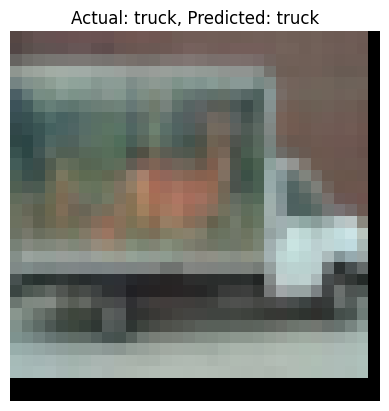

In [51]:
with torch.no_grad():
    example_input, example_label = next(iter(trainloader))
    example_input = example_input.to(device)
    example_label = example_label.to(device)
    output = cnn(example_input)
    _, predicted_label = torch.max(output, 1)


image = example_input.squeeze().cpu()
image = image.permute(1, 2, 0) * 0.5 + 0.5
plt.imshow(image)
plt.title(f"Actual: {trainset.classes[example_label]}, Predicted: {trainset.classes[predicted_label.item()]}")
plt.axis('off')
plt.show()